In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load and clean data
df = pd.read_csv("Fbref_2023_1.csv", encoding='latin1')
df.columns = df.columns.str.strip()

In [4]:
# Handle missing values
print(f'Initial Missing Values:\n{df.isnull().sum()}')

Initial Missing Values:
Rk                   0
Edited Name          0
Original Name        0
Matching Name        0
Market Value Euro    7
Nation               0
Pos                  0
Squad                0
Comp                 0
Born                 0
MP                   0
90s                  0
Goals                0
Goals Per Match      0
Shots                0
SoT                  0
G/Sh                 0
G/SoT                0
ShoDist              0
ShoFK                0
ShoPK                0
PKatt                0
PasTotCmp            0
PasTotAtt            0
PasTotDist           0
PasTotPrgDist        0
PasShoCmp            0
PasShoAtt            0
PasMedCmp            0
PasMedAtt            0
PasLonCmp            0
PasLonAtt            0
Assists              0
PasAss               0
Pas3rd               0
PPA                  0
CrsPA                0
PasProg              0
PasLive              0
PasDead              0
PasFK                0
TB                   0
Sw        

In [5]:
# Clean 'Market Value Euro' column
df['Market Value Euro'] = df['Market Value Euro'].str.replace(',', '')
df['Market Value Euro'] = pd.to_numeric(df['Market Value Euro'], errors='coerce').fillna(0).astype(int)

In [6]:
# Replace missing values in 'Market Value Euro' with median for robustness
market_value_median = df[df['Market Value Euro'] > 0]['Market Value Euro'].median()
df['Market Value Euro'] = df['Market Value Euro'].replace(0, market_value_median)

In [7]:
# Verify missing values
print(f'Post-Cleaning Missing Values:\n{df.isnull().sum()}')

Post-Cleaning Missing Values:
Rk                   0
Edited Name          0
Original Name        0
Matching Name        0
Market Value Euro    0
Nation               0
Pos                  0
Squad                0
Comp                 0
Born                 0
MP                   0
90s                  0
Goals                0
Goals Per Match      0
Shots                0
SoT                  0
G/Sh                 0
G/SoT                0
ShoDist              0
ShoFK                0
ShoPK                0
PKatt                0
PasTotCmp            0
PasTotAtt            0
PasTotDist           0
PasTotPrgDist        0
PasShoCmp            0
PasShoAtt            0
PasMedCmp            0
PasMedAtt            0
PasLonCmp            0
PasLonAtt            0
Assists              0
PasAss               0
Pas3rd               0
PPA                  0
CrsPA                0
PasProg              0
PasLive              0
PasDead              0
PasFK                0
TB                   0
Sw  

In [8]:
df.head()

,Rk,Edited Name,Original Name,Matching Name,Market Value Euro,Nation,Pos,Squad,Comp,Born,MP,90s,Goals,Goals Per Match,Shots,SoT,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasMedCmp,PasMedAtt,PasLonCmp,PasLonAtt,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDriPast,Blocks,BlkSh,BlkPass,Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToTkl,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost
0,1,Brenden Aaronson,Brenden Aaronson,Brenden Aaronson,25000000,USA,MFFW,Leeds United,Premier League,2000,20,17.7,1,0.050,1.53,0.28,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,293.0,85.7,13.3,16.2,5.93,7.74,0.90,2.37,0.11,1.75,1.75,0.45,0.11,3.22,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,0.96,1.69,0.11,1.58,0.06,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,1.75,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19
1,2,Yunis Abdelhamid,Yunis Abdelhamid,Yunis Abdelhamid,700000,MAR,DF,Reims,Ligue 1,1987,22,22.0,0,-,0.86,0.05,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,751.5,318.5,10.9,12.9,23.20,25.70,3.77,7.00,0.05,0.27,2.91,0.09,0.00,4.50,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,0.36,2.23,0.77,1.45,2.00,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,0.36,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23
2,3,Himad Abdelli,Himad Abdelli,Himad Abdelli,2500000,FRA,MFFW,Angers,Ligue 1,1999,14,8.6,0,-,1.05,0.35,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,676.0,188.1,18.5,22.0,15.50,18.70,4.42,5.93,0.00,1.51,3.95,1.74,0.35,6.40,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,1.05,1.51,0.12,1.40,0.93,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,1.51,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05
3,4,Salis Abdul Samed,Salis Abdul Samed,Salis Abdul Samed,13000000,GHA,MF,Lens,Ligue 1,2000,20,20.0,1,0.050,0.60,0.15,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,946.3,226.9,29.6,31.8,24.70,26.20,3.35,4.30,0.00,0.50,6.00,0.55,0.10,5.60,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,0.45,1.30,0.35,0.95,1.10,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,0.40,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50
4,5,Laurent Abergel,Laurent Abergel,Laurent Abergel,3000000,FRA,MF,Lorient,Ligue 1,1993,15,12.9,0,-,0.31,0.00,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,613.6,224.7,17.9,19.4,15.70,17.80,2.64,3.95,0.08,0.62,3.88,0.39,0.00,5.04,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,1.94,1.40,0.23,1.16,1.16,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,0.31,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39


In [9]:
df.describe()

,Rk,Market Value Euro,Born,MP,90s,Goals,Shots,SoT,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasMedCmp,PasMedAtt,PasLonCmp,PasLonAtt,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDriPast,Blocks,BlkSh,BlkPass,Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToTkl,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost
count,2603.000000,2.603000e+03,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.00000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,1330.674222,1.097502e+07,1996.121014,11.926623,8.536650,1.036112,1.248417,0.416204,0.064648,0.167933,14.251402,0.036400,0.007883,0.010753,33.446754,42.799101,579.841836,199.877084,15.413139,17.806081,13.638160,16.232021,3.297172,6.009670,0.083196,0.874118,2.53020,0.747952,0.200826,3.344683,38.641663,3.983915,1.010081,0.110192,0.317334,1.668932,1.845313,0.417488,0.177295,0.160188,0.003181,33.446754,0.173158,0.914349,2.071287,1.495152,0.169835,0.112128,0.150576,0.107568,0.036078,0.209481,0.143289,0.010507,0.014118,0.025993,0.012847,0.002731,1.706535,0.991959,0.816412,0.650738,0.239428,0.750592,1.443515,0.692854,1.081552,0.274679,0.806988,0.819647,1.567399,0.022347,53.711179,4.631856,15.744741,24.250903,14.277303,2.171998,53.700269,1.800661,0.718540,0.854706,31.653780,170.900127,82.754802,1.676162,1.271767,0.437457,1.667046,1.046239,34.403169,3.965789,0.242132,0.020645,0.006888,1.304867,1.135225,0.206688,1.668932,0.991959,0.009389,0.015217,0.002993,4.948006,1.301502,1.496623
std,775.768064,1.605364e+07,4.443897,6.843787,6.555523,2.026592,1.420641,0.762617,0.119432,0.262946,8.643613,0.201239,0.039440,0.050259,17.063370,18.474655,324.760344,146.101983,8.493182,9.060874,9.164115,9.700131,2.961249,4.993455,0.274762,1.083900,2.18308,1.075307,0.525261,2.583467,17.604301,4.007179,1.181270,0.387057,0.572661,2.327549,3.332131,1.087731,0.650368,0.510247,0.029092,17.063370,0.405970,1.078699,1.902404,1.429599,0.485907,0.450449,0.464514,0.267017,0.159291,0.463819,0.342458,0.053393,0.138301,0.252677,0.055566,0.023966,1.737200,1.240469,1.161759,0.915524,0.573798,1.004263,1.518187,0.965807,1.189819,0.485079,1.098311,0.874979,1.713290,0.070250,19.232061,7.452705,12.208934,13.553174,10.581387,2.499124,19.235871,2.240682,1.176267,1.259185,13.985231,94.644713,56.177089,1.930095,1.530402,0.869851,1.849095,1.511231,15.346527,4.124910,0.583321,0.300845,0.110667,1.434718,1.226388,0.558427,2.327549,1.240469,0.044267,0.077854,0.020732,2.886439,1.548270

In [10]:
# Encode with LabelEncoder
le = LabelEncoder()
df['Pos_Cat'] = le.fit_transform(df['Pos'])
df['Nation_Cat'] = le.fit_transform(df['Nation'])
df['Squad_Cat'] = le.fit_transform(df['Squad'])
df['Comp_Cat'] = le.fit_transform(df['Comp'])

In [11]:
df.head()

,Rk,Edited Name,Original Name,Matching Name,Market Value Euro,Nation,Pos,Squad,Comp,Born,MP,90s,Goals,Goals Per Match,Shots,SoT,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasMedCmp,PasMedAtt,PasLonCmp,PasLonAtt,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDriPast,Blocks,BlkSh,BlkPass,Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToTkl,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,Pos_Cat,Nation_Cat,Squad_Cat,Comp_Cat
0,1,Brenden Aaronson,Brenden Aaronson,Brenden Aaronson,25000000,USA,MFFW,Leeds United,Premier League,2000,20,17.7,1,0.050,1.53,0.28,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,293.0,85.7,13.3,16.2,5.93,7.74,0.90,2.37,0.11,1.75,1.75,0.45,0.11,3.22,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,0.96,1.69,0.11,1.58,0.06,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,1.75,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,9,98,44,3
1,2,Yunis Abdelhamid,Yunis Abdelhamid,Yunis Abdelhamid,700000,MAR,DF,Reims,Ligue 1,1987,22,22.0,0,-,0.86,0.05,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,751.5,318.5,10.9,12.9,23.20,25.70,3.77,7.00,0.05,0.27,2.91,0.09,0.00,4.50,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,0.36,2.23,0.77,1.45,2.00,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,0.36,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,0,64,73,2
2,3,Himad Abdelli,Himad Abdelli,Himad Abdelli,2500000,FRA,MFFW,Angers,Ligue 1,1999,14,8.6,0,-,1.05,0.35,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,676.0,188.1,18.5,22.0,15.50,18.70,4.42,5.93,0.00,1.51,3.95,1.74,0.35,6.40,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,1.05,1.51,0.12,1.40,0.93,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,1.51,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,9,36,2,2
3,4,Salis Abdul Samed,Salis Abdul Samed,Salis Abdul Samed,13000000,GHA,MF,Lens,Ligue 1,2000,20,20.0,1,0.050,0.60,0.15,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,946.3,226.9,29.6,31.8,24.70,26.20,3.35,4.30,0.00,0.50,6.00,0.55,0.10,5.60,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,0.45,1.30,0.35,0.95,1.10,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,0.40,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,7,41,46,2
4,5,Laurent Abergel,Laurent Abergel,Laurent Abergel,3000000,FRA,MF,Lorient,Ligue 1,1993,15,12.9,0,-,0.31,0.00,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,613.6,224.7,17.9,19.4,15.70,17.80,2.64,3.95,0.08,0.62,3.88,0.39,0.00,5.04,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,1.94,1.40,0.23,1.16,1.16,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,0.31,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,7,36,50,2


In [12]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

In [13]:
numeric_df.head()

,Rk,Market Value Euro,Born,MP,90s,Goals,Shots,SoT,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasMedCmp,PasMedAtt,PasLonCmp,PasLonAtt,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDriPast,Blocks,BlkSh,BlkPass,Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToTkl,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,Pos_Cat,Nation_Cat,Squad_Cat,Comp_Cat
0,1,25000000,2000,20,17.7,1,1.53,0.28,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,293.0,85.7,13.3,16.2,5.93,7.74,0.90,2.37,0.11,1.75,1.75,0.45,0.11,3.22,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,0.96,1.69,0.11,1.58,0.06,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,1.75,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,9,98,44,3
1,2,700000,1987,22,22.0,0,0.86,0.05,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,751.5,318.5,10.9,12.9,23.20,25.70,3.77,7.00,0.05,0.27,2.91,0.09,0.00,4.50,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,0.36,2.23,0.77,1.45,2.00,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,0.36,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,0,64,73,2
2,3,2500000,1999,14,8.6,0,1.05,0.35,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,676.0,188.1,18.5,22.0,15.50,18.70,4.42,5.93,0.00,1.51,3.95,1.74,0.35,6.40,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,1.05,1.51,0.12,1.40,0.93,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,1.51,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,9,36,2,2
3,4,13000000,2000,20,20.0,1,0.60,0.15,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,946.3,226.9,29.6,31.8,24.70,26.20,3.35,4.30,0.00,0.50,6.00,0.55,0.10,5.60,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,0.45,1.30,0.35,0.95,1.10,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,0.40,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,7,41,46,2
4,5,3000000,1993,15,12.9,0,0.31,0.00,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,613.6,224.7,17.9,19.4,15.70,17.80,2.64,3.95,0.08,0.62,3.88,0.39,0.00,5.04,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,1.94,1.40,0.23,1.16,1.16,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,0.31,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,7,36,50,2


In [14]:
# Scale features using RobustScaler
scaler = RobustScaler()
features_to_scale = numeric_df.drop(columns=['Market Value Euro', 'Pos_Cat','Nation_Cat','Squad_Cat','Comp_Cat'])
scaled_features = scaler.fit_transform(features_to_scale)
scaled_numeric_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

In [15]:
# Shift the scaled data to ensure no negative values
min_value = scaled_features.min()
shifted_scaled_features = scaled_features - min_value

In [16]:
# Convert back to DataFrame
scaled_numeric_df = pd.DataFrame(shifted_scaled_features, columns=features_to_scale.columns)

In [17]:
# Add non-scaled columns
scaled_numeric_df['Market Value Euro'] = df['Market Value Euro']
scaled_numeric_df['Pos_Cat'] = df['Pos_Cat']
scaled_numeric_df['Nation_Cat'] = df['Nation_Cat']
scaled_numeric_df['Squad_Cat'] = df['Squad_Cat']
scaled_numeric_df['Comp_Cat'] = df['Comp_Cat']

In [18]:
# Drop 'Rk' if exists in the dataset
if 'Rk' in scaled_numeric_df.columns:
    scaled_numeric_df = scaled_numeric_df.drop('Rk', axis=1)

In [19]:
scaled_numeric_df.head()

,Born,MP,90s,Goals,Shots,SoT,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasMedCmp,PasMedAtt,PasLonCmp,PasLonAtt,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDriPast,Blocks,BlkSh,BlkPass,Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToTkl,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,Market Value Euro,Pos_Cat,Nation_Cat,Squad_Cat,Comp_Cat
0,2.829903,2.796936,3.104628,3.258475,2.682525,2.427966,2.658475,2.864535,2.595013,2.368475,2.258475,2.258475,1.856605,1.793257,1.632608,1.777307,2.128475,2.173569,1.702377,1.628737,1.764751,1.817199,3.258475,3.189509,2.078475,2.201332,2.698475,2.286252,1.826920,2.362855,2.438599,3.675141,1.925141,2.969318,2.266475,13.566167,2.938475,2.878475,2.318475,1.856605,1.883475,2.338877,3.047948,2.910512,7.349384,4.349384,2.869586,4.412321,2.318475,2.925141,3.067998,2.258475,2.258475,2.318475,2.258475,2.318475,2.349089,1.941643,2.082865,2.758475,2.806862,2.161700,2.417895,2.863738,3.036252,2.258475,3.395975,1.700952,1.877522,2.318475,1.864407,1.849438,1.785838,1.933971,2.763316,2.665682,1.864407,3.402619,3.090054,3.291261,2.052225,2.073360,1.934891,2.397088,2.304527,2.767247,2.988720,4.118940,2.109665,2.661602,2.155026,2.258475,2.258475,1.819222,3.374177,3.067998,2.969318,1.941643,2.258475,2.258475,2.258475,2.210856,1.861214,2.329341,25000000,9,98,44,3
1,0.972760,2.950782,3.472150,2.258475,2.258475,2.038136,2.258475,2.258475,2.066167,2.258475,2.258475,2.258475,2.571559,2.497605,2.709784,3.012321,1.888475,1.862248,3.234084,3.124780,2.565309,2.594045,2.713020,1.913647,2.542475,1.858475,2.258475,2.730697,2.532256,2.521289,3.904437,2.258475,3.147363,2.021527,2.154475,2.258475,2.258475,2.258475,2.258475,2.571559,2.841808,2.077570,1.960229,1.963804,2.258475,2.258475,3.258475,2.258475,2.348475,2.591808,2.925141,2.258475,2.258475,2.308475,2.258475,2.258475,2.905724,3.010950,3.058475,2.883475,2.064926,3.032668,2.570069,2.074264,3.636252,3.908475,3.233475,3.417767,3.269057,2.308475,2.508475,3.235882,3.065550,2.629336,1.465252,2.161177,2.508475,2.028745,2.174264,2.151917,2.883475,3.009429,3.185348,1.911940,1.751896,2.223387,1.969646,2.235219,2.365617,1.719813,2.086061,2.258475,2.258475,2.473428,1.919632,2.496570,2.021527,3.010950,2.258475,2.258475,2.258475,2.816298,3.121488,2.360837,700000,0,64,73,2
2,2.687046,2.335398,2.326851,2.258475,2.378728,2.546610,2.258475,2.258475,2.614244,2.258475,2.258475,2.258475,2.641652,2.597605,2.532409,2.320544,2.648475,2.720739,2.551158,2.541690,2.746620,2.414515,2.258475,2.982613,2.958475,3.429903,3.658475,3.390419,2.754994,2.042258,2.059717,3.258475,2.436252,2.370924,2.730475,2.258475,2.258475,2.258475,2.258475,2.641652,2.841808,2.650434,2.631282,2.954399,2.258475,2.258475,2.925141,2.258475,2.378475,1.991808,2.258475,2.258475,2.258475,2.258475,2.258475,2.258475,3.171096,2.822831,2.892621,3.383475,2.645571,3.366001,3.287460,2.982159,2.836252,2.283475,3.170975,2.470864,2.221438,2.258475,2.652542,1.975478,2.175556,3.059799,2.479775,2.186403,2.652542,3.452168,4.037422,3.094540,3.414725,3.622978,3.660668,2.906989,3.284790,2.890054,2.710791,2.522040,2.895379,2.710256,2.189509,2.258475,2.258475,2.865951,2.564260,2.258475,2.370924,2.822831,2.258475,2.258475,2.258475,3.326502,2.265324,2.219104,2500000,9,36,2,2
3,2.829903,2.796936,3.301210,3.258475,2.093918,2.207627,3.058475,3.258475,2.720013,2.258475,2.258475,2.258475,3.552867,3.267170,3.167437,2.526379,3.758475,3.645267,3.367122,3.166430,2.448154,2.141025,2.258475,2.111923,3.778475,2.296570,2.658475,3.112641,3.451050,2.086993,2.649779,2.675141,2.369586,2.089800,2.162475,2.258475,2.258475,2.

In [20]:
# Check which columns contain negative values
negative_columns = scaled_numeric_df.apply(lambda col: col[col < 0].count() > 0)

In [21]:
print("Columns with negative values:")
print(negative_columns[negative_columns == True].index.tolist())

Columns with negative values:
[]


In [22]:
# Check unique values in 'pos' column
unique_pos = df['Pos'].unique()
print("Unique values in 'pos':")
print(unique_pos)

Unique values in 'pos':
['MFFW' 'DF' 'MF' 'FWMF' 'FW' 'DFFW' 'MFDF' 'GK' 'DFMF' 'FWDF']


In [23]:
# Check unique values in 'pos_cat' column
unique_pos_cat = df['Pos_Cat'].unique()
print("Unique values in 'pos_cat':")
print(unique_pos_cat)

Unique values in 'pos_cat':
[9 0 7 5 3 1 8 6 2 4]


In [24]:
# Create a mapping between 'pos' and 'pos_cat'
pos_mapping = df[['Pos', 'Pos_Cat']].drop_duplicates().sort_values(by='Pos_Cat').reset_index(drop=True)

print("Mapping between 'pos' and 'pos_cat':")
print(pos_mapping)

Mapping between 'pos' and 'pos_cat':
    Pos  Pos_Cat
0    DF        0
1  DFFW        1
2  DFMF        2
3    FW        3
4  FWDF        4
5  FWMF        5
6    GK        6
7    MF        7
8  MFDF        8
9  MFFW        9


In [25]:
df['Pos_Cat'].value_counts()

Pos_Cat
0    798
7    587
3    394
5    238
9    199
6    161
2     98
8     60
1     38
4     30
Name: count, dtype: int64

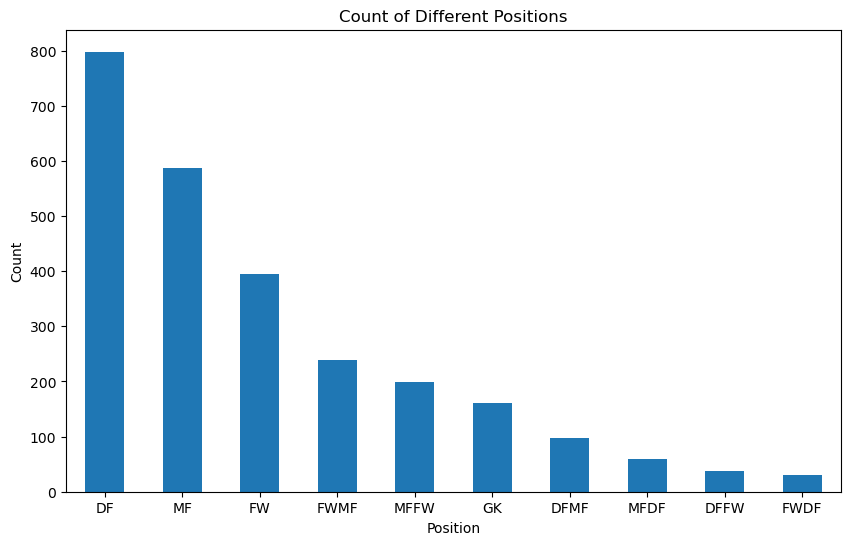

In [26]:
# Plot histogram count of positions
plt.figure(figsize=(10, 6))
df['Pos'].value_counts().plot(kind='bar')
plt.title('Count of Different Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

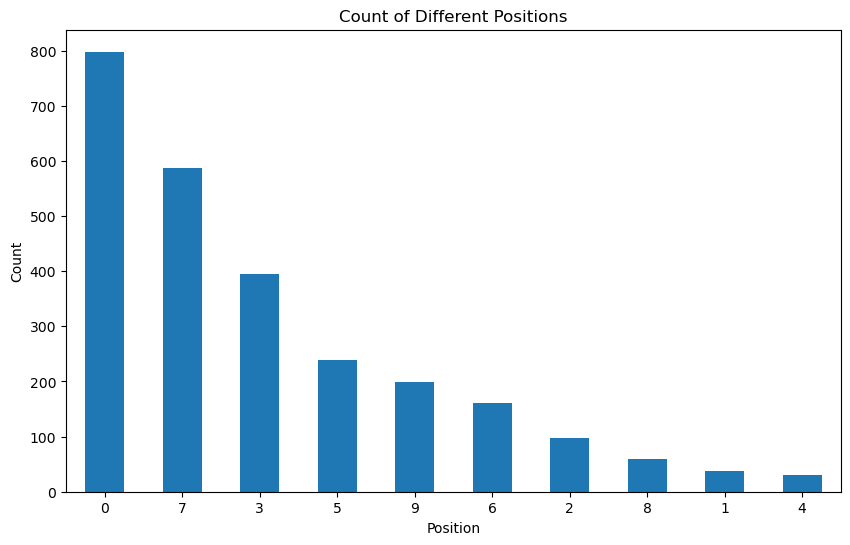

In [27]:
# Plot histogram count of positions
plt.figure(figsize=(10, 6))
scaled_numeric_df['Pos_Cat'].value_counts().plot(kind='bar')
plt.title('Count of Different Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

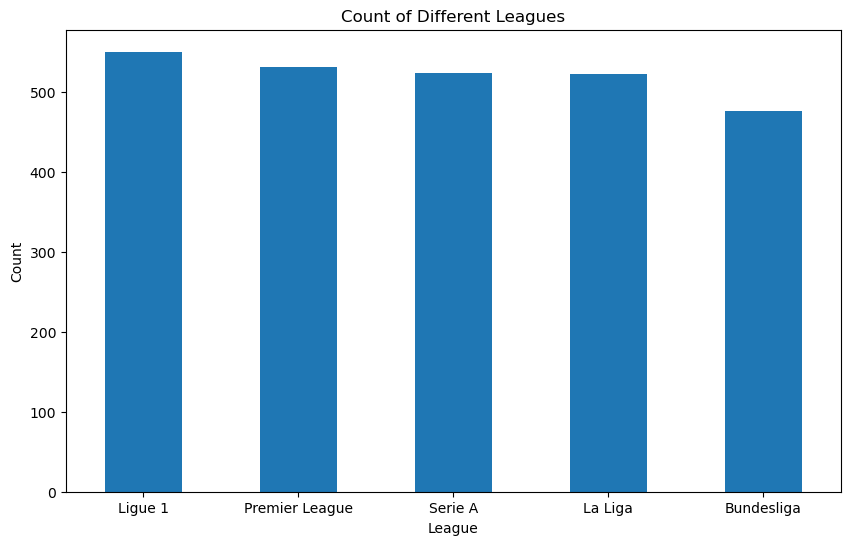

In [28]:
# Plot histogram count of positions
plt.figure(figsize=(10, 6))
df['Comp'].value_counts().plot(kind='bar')
plt.title('Count of Different Leagues')
plt.xlabel('League')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [29]:
# Calculate correlation matrix
correlation_matrix = scaled_numeric_df.corr()

# Print correlation matrix
correlation_matrix

,Born,MP,90s,Goals,Shots,SoT,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasMedCmp,PasMedAtt,PasLonCmp,PasLonAtt,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDriPast,Blocks,BlkSh,BlkPass,Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToTkl,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,Market Value Euro,Pos_Cat,Nation_Cat,Squad_Cat,Comp_Cat
Born,1.000000,-0.204952,-0.223275,-0.055023,0.086256,0.076791,-0.008982,-0.047463,-0.018289,-0.037378,-0.090853,-0.110553,-0.076618,-0.084105,-0.137969,-0.236115,0.007177,0.020816,-0.080143,-0.073837,-0.216103,-0.230222,0.025597,0.006405,-0.085956,0.036340,0.033825,-0.014882,-0.056995,-0.132186,-0.203981,-0.020529,-0.071450,0.009929,0.024141,-0.034287,-0.012231,-0.035512,-0.039661,-0.076618,-0.050371,0.092837,0.061603,0.050969,-4.971355e-02,0.087660,0.032853,0.033598,0.030754,0.053980,0.043033,-0.037092,0.025171,0.030411,0.015055,0.012592,0.138845,0.125689,0.090603,0.095345,0.084950,0.054022,0.071356,0.056108,0.081702,-0.056139,0.113312,0.044613,-0.071066,-0.040858,-0.019507,-0.217272,-0.159057,0.020126,0.130287,0.106406,-0.019199,0.236298,0.171047,0.211006,0.018572,0.097148,0.052284,0.150544,0.100379,0.149421,0.168624,0.184955,-0.002519,0.150702,0.049468,-0.000743,1.516218e-03,0.099043,0.094421,-0.016947,0.009929,0.125689,0.036988,0.004151,-0.013527,0.097706,-0.025794,0.067715,0.149859,0.033522,0.022615,0.051946,0.023673
MP,-0.204952,1.000000,0.903430,0.403255,0.000029,0.005540,0.172649,0.296482,0.347969,0.019146,0.124266,0.124911,0.070227,0.062144,0.086381,0.095294,0.053613,0.045229,0.048201,0.042636,0.105940,0.088847,0.045058,0.044320,0.133695,0.012675,-0.018781,0.087806,0.055246,0.044311,0.105556,0.012056,0.064809,0.001415,-0.023613,0.053117,0.026512,0.045884,0.059563,0.070227,-0.008002,-0.042352,0.029023,0.047071,4.287612e-02,-0.038182,-0.039023,0.011778,-0.004794,0.044406,0.062492,0.087040,-0.014863,-0.036287,0.078599,0.061419,-0.091481,-0.085581,-0.089585,-0.031765,-0.045004,-0.046314,-0.081685,-0.080365,-0.055862,-0.005989,-0.057948,0.012415,-0.023856,0.002205,0.024552,0.025056,0.021199,0.044114,-0.036925,-0.016250,0.024210,-0.088544,-0.073665,-0.072954,0.048351,0.028027,0.039767,-0.022540,-0.026755,0.002413,-0.084919,-0.097871,0.048245,-0.045902,-0.097918,-0.051288,-4.054109e-02,-0.114665,-0.015712,-0.034382,0.001415,-0.085581,0.080521,-0.021440,0.035027,-0.006899,-0.043123,-0.125121,0.288223,0.036133,-0.003792,-0.015894,0.050542
90s,-0.223275,0.903430,1.000000,0.373602,-0.115291,-0.067780,0.128049,0.239088,0.221729,0.007739,0.090548,0.091246,0.128756,0.116564,0.197481,0.265107,0.022329,-0.002073,0.153306,0.134968,0.234663,0.234547,0.009975,-0.034165,0.131329,-0.047030,-0.037695,0.050016,0.092902,0.130661,0.220785,-0.011781,0.082434,-0.056966,-0.005221,0.021035,0.008055,0.026424,0.056568,0.128756,-0.016622,-0.100431,-0.065314,-0.043069,2.310533e-02,-0.058315,-0.069990,-0.043576,-0.022366,-0.003422,0.013848,0.081863,-0.022767,-0.036631,0.020484,0.027130,-0.120224,-0.102817,-0.081810,-0.067173,-0.091286,-0.061706,-0.114642,-0.116141,-0.073628,0.044644,-0.099556,0.035970,0.058739,0.066551,0.050690,0.192567,0.204327,0.026711,-0.181734,-0.133700,0.050427,-0.172383,-0.124635,-0.157127,0.058932,0.020335,0.061362,-0.106195,-0.098250,-0.079210,-0.196684,-0.177101,0.033699,-0.175241,-0.113475,-0.045970,-3.190355e-02,-0.184814,-0.090303,-0.091175,-0.056966,-0.102817,0.025408,-0.014521,0.062987,-0.029101,-0.063298,-0.187371,0.326777,-0.065929,-0.007653,-0.011357,0.042009
Goals,-0.055023,0.403255,0.373602,1.000000,0.335194,0.315788,0.456730,0.502619,0

In [30]:
# Check for colinearity
# Drop highly correlated features
threshold = 0.95
corr_matrix = scaled_numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
scaled_numeric_df = scaled_numeric_df.drop(columns=to_drop)
print(f"Dropped columns due to high correlation: {to_drop}")

# leave one of each!!!

Dropped columns due to high correlation: ['PasTotAtt', 'PasShoAtt', 'PasMedAtt', 'PasLive', 'PasCmp', 'Touches', 'TouLive', 'Crs', 'TklW']


# Machine Learning

In [31]:
# Separate data for ML classification (Position)
X = scaled_numeric_df.drop(['Pos_Cat'], axis=1)
y_pos_cat = scaled_numeric_df['Pos_Cat']

In [32]:
# Train-test split for classification (Pos_Cat)
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X, y_pos_cat, test_size=0.2, random_state=42)

## Random Forest Train and Test

In [33]:
# Train Random Forest classifier with selected features
rf_pos_cat = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pos_cat.fit(X_train_pos, y_train_pos)

# random state not random

RandomForestClassifier(random_state=42)

In [34]:
# Predict and evaluate
y_pred_pos = rf_pos_cat.predict(X_test_pos)
print("Classification Report for Pos_Cat Prediction:")
print(classification_report(y_test_pos, y_pred_pos))

Classification Report for Pos_Cat Prediction:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       155
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.55      0.68      0.61        82
           4       0.00      0.00      0.00         3
           5       0.49      0.39      0.43        54
           6       1.00      1.00      1.00        25
           7       0.74      0.82      0.78       125
           8       0.00      0.00      0.00        14
           9       0.33      0.24      0.28        34

    accuracy                           0.70       521
   macro avg       0.39      0.41      0.40       521
weighted avg       0.62      0.70      0.65       521



C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_pos, y_pred_pos)

# Print confusion matrix (optional: visualize with seaborn heatmap)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[150   0   0   0   0   0   0   5   0   0]
 [  8   0   0   0   0   1   0   0   0   2]
 [ 17   0   0   0   0   0   0   1   0   0]
 [  1   0   0  56   0  13   0  10   0   2]
 [  1   0   0   1   0   0   0   0   0   1]
 [  0   0   0  25   0  21   0   4   0   4]
 [  0   0   0   0   0   0  25   0   0   0]
 [  3   0   0  11   0   1   0 103   0   7]
 [  6   0   0   2   0   1   0   5   0   0]
 [  1   0   0   7   0   6   0  12   0   8]]


## Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_pos, y_train_pos)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_pos_cat = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_pos_cat.predict(X_test_pos)
print("Classification Report for Best Model:")
print(classification_report(y_test_pos, y_pred_best))

# Calculate confusion matrix for best model
cm_best = confusion_matrix(y_test_pos, y_pred_best)
print("Confusion Matrix for Best Model:")
print(cm_best)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       155
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.57      0.72      0.63        82
           4       0.00      0.00      0.00         3
           5       0.53      0.31      0.40        54
           6       1.00      1.00      1.00        25
           7       0.75      0.82      0.79       125
           8       0.00      0.00      0.00        14
           9       0.27      0.26      0.27        34

    accuracy                           0.70       521
   macro avg       0.39      0.41      0.40       521
weighted avg       0.63      0.70      0.66       521

Confusion Matrix for Best Model:
[[152

C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Feature importance analysis

In [37]:
# Get feature importances from the trained model
importances = rf_pos_cat.feature_importances_

# Create a DataFrame to store feature names and their importance
feature_importances = pd.DataFrame({'Feature': X_train_pos.columns, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

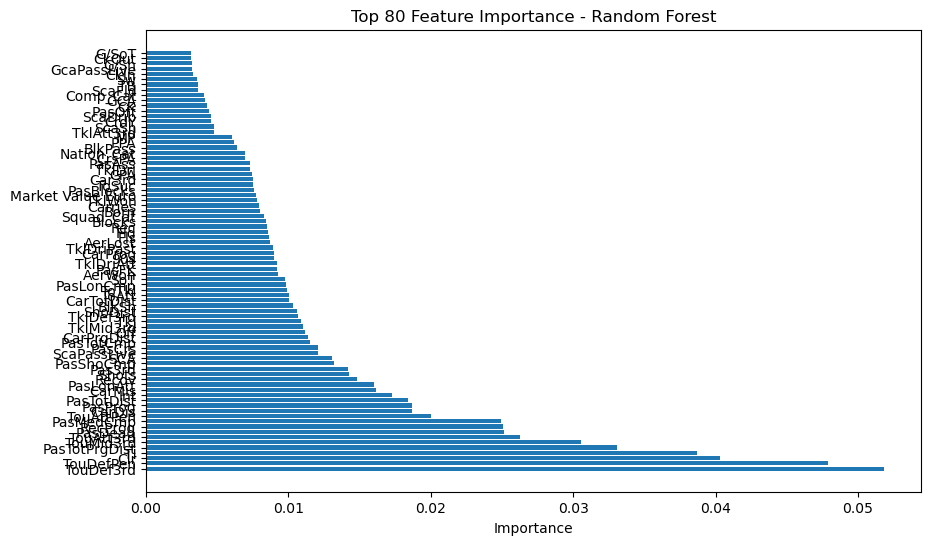

In [38]:
n = 80  # Number of top features to display
top_n_features = feature_importances.head(n)

plt.figure(figsize=(10, 6))
plt.barh(top_n_features['Feature'], top_n_features['Importance'], align='center')
plt.xlabel('Importance')
plt.title(f'Top {n} Feature Importance - Random Forest')
plt.show()

In [39]:
# Select top features
top_features = top_n_features['Feature'].tolist()

# Retrain the model with selected top features
X_train_pos_selected = X_train_pos[top_features]
X_test_pos_selected = X_test_pos[top_features]

# Train Random Forest classifier with selected features
rf_pos_cat_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pos_cat_selected.fit(X_train_pos_selected, y_train_pos)

# Predict and evaluate with the retrained model
y_pred_pos_selected = rf_pos_cat_selected.predict(X_test_pos_selected)
print("Classification Report for Pos_Cat Prediction with Selected Features:")
print(classification_report(y_test_pos, y_pred_pos_selected))

# Print confusion matrix (optional: visualize with seaborn heatmap)
cm_selected = confusion_matrix(y_test_pos, y_pred_pos_selected)
print("Confusion Matrix with Selected Features:")
print(cm_selected)

Classification Report for Pos_Cat Prediction with Selected Features:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       155
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.56      0.71      0.62        82
           4       0.00      0.00      0.00         3
           5       0.50      0.30      0.37        54
           6       1.00      1.00      1.00        25
           7       0.74      0.80      0.77       125
           8       0.00      0.00      0.00        14
           9       0.31      0.29      0.30        34

    accuracy                           0.69       521
   macro avg       0.39      0.41      0.39       521
weighted avg       0.62      0.69      0.65       521

Confusion Matrix with Selected Features:
[[150   0   1   0   0   0   0   4   0   0]
 [  8   0   2   0   0   0   0   0   0   1]
 [ 17   0   0   0   0   0   0   1   0   0]
 [

C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Other models

In [40]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(max_iter=50, random_state=42)
lr_model.fit(X_train_pos, y_train_pos)
y_pred_lr = lr_model.predict(X_test_pos)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_pos, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_pos, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46       155
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        82
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00       125
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        34

    accuracy                           0.30       521
   macro avg       0.03      0.10      0.05       521
weighted avg       0.09      0.30      0.14       521

Logistic Regression Confusion Matrix:
[[155   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0]
 [ 82   0   0   0   0   0   0  

C:\Users\firda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pos, y_train_pos)
y_pred_knn = knn_model.predict(X_test_pos)
print("KNN Classification Report:")
print(classification_report(y_test_pos, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test_pos, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.66      0.45       155
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.32      0.18      0.23        82
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        54
           6       0.11      0.08      0.09        25
           7       0.29      0.25      0.27       125
           8       0.00      0.00      0.00        14
           9       0.22      0.12      0.15        34

    accuracy                           0.30       521
   macro avg       0.13      0.13      0.12       521
weighted avg       0.24      0.30      0.25       521

KNN Confusion Matrix:
[[103   0   1   7   0   5   6  31   0   2]
 [  6   0   0   1   0   0   1   2   0   1]
 [  6   1   0   1   0   0   1   7   0   2]
 [ 46   0   2  15   1   3   3   8   0   4]
 [  1   0   0   2   

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_pos, y_train_pos)
y_pred_gb = gb_model.predict(X_test_pos)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test_pos, y_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test_pos, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       155
           1       0.00      0.00      0.00        11
           2       0.25      0.11      0.15        18
           3       0.55      0.71      0.62        82
           4       0.00      0.00      0.00         3
           5       0.43      0.28      0.34        54
           6       1.00      1.00      1.00        25
           7       0.74      0.72      0.73       125
           8       0.00      0.00      0.00        14
           9       0.23      0.26      0.24        34

    accuracy                           0.67       521
   macro avg       0.40      0.40      0.40       521
weighted avg       0.62      0.67      0.64       521

Gradient Boosting Confusion Matrix:
[[150   0   1   0   0   0   0   3   1   0]
 [  8   0   2   0   0   0   0   0   0   1]
 [ 16   0   2   0   0   0   0   0   0   0]
 [  0   0   0  58   0   9   0  10  

C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_pos, y_train_pos)
y_pred_xgb = xgb_model.predict(X_test_pos)
print("XGBoost Classification Report:")
print(classification_report(y_test_pos, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test_pos, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.88       155
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.56      0.66      0.61        82
           4       0.00      0.00      0.00         3
           5       0.52      0.31      0.39        54
           6       1.00      1.00      1.00        25
           7       0.78      0.81      0.80       125
           8       0.00      0.00      0.00        14
           9       0.24      0.32      0.28        34

    accuracy                           0.69       521
   macro avg       0.39      0.41      0.40       521
weighted avg       0.64      0.69      0.66       521

XGBoost Confusion Matrix:
[[150   0   2   0   0   0   0   3   0   0]
 [  7   0   3   0   0   0   0   0   0   1]
 [ 18   0   0   0   0   0   0   0   0   0]
 [  0   0   0  54   0   7   0   9   1  11]
 [  0   0   

C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
from sklearn.neural_network import MLPClassifier

# Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_pos, y_train_pos)
y_pred_mlp = mlp_model.predict(X_test_pos)
print("Neural Network (MLP) Classification Report:")
print(classification_report(y_test_pos, y_pred_mlp))
print("Neural Network (MLP) Confusion Matrix:")
print(confusion_matrix(y_test_pos, y_pred_mlp))

Neural Network (MLP) Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.01       155
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.16      0.99      0.27        82
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00       125
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        34

    accuracy                           0.16       521
   macro avg       0.04      0.10      0.03       521
weighted avg       0.10      0.16      0.05       521

Neural Network (MLP) Confusion Matrix:
[[  1   0   0 154   0   0   0   0   0   0]
 [  0   0   0  11   0   0   0   0   0   0]
 [  0   0   0  18   0   0   0   0   0   0]
 [  1   0   0  81   0   0   0

C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_pos, y_train_pos)
y_pred_nb = nb_model.predict(X_test_pos)
print("Naive Bayes Classification Report:")
print(classification_report(y_test_pos, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test_pos, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.92      0.45       155
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        18
           3       0.28      0.10      0.14        82
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        25
           7       0.36      0.04      0.07       125
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        34

    accuracy                           0.30       521
   macro avg       0.09      0.11      0.07       521
weighted avg       0.22      0.30      0.17       521

Naive Bayes Confusion Matrix:
[[143   0   0   7   0   0   0   5   0   0]
 [ 10   0   0   1   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0]
 [ 73   0   0   8   0   0   0   1   0   0]
 [  

C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid to search through
param_distributions = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to perform
    'learning_rate': [0.01, 0.1, 0.2],  # Boosting learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_distributions, 
                                   n_iter=50, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_pos, y_train_pos)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Predict on the test set and evaluate
y_pred_gb = random_search.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_gb))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters found:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best F1-score found: 0.4405323434172554

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       155
           1       0.00      0.00      0.00        11
           2       0.27      0.17      0.21        18
           3       0.58      0.70      0.63        82
           4       0.00      0.00      0.00         3
           5       0.51      0.33      0.40        54
           6       1.00      1.00      1.00        25
           7       0.79      0.76      0.77       125
           8       0.00      0.00      0.00        14
           9       0.21      0.26      0.24        34

    accuracy                           0.68       521
   macro avg       0.42      0.42      0.41       521
weighted avg       0.65      

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pos, y_train_pos)

# Define the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid to search through with fewer options
param_distributions = {
    'n_estimators': [50, 100],  # Reduced options
    'learning_rate': [0.01, 0.1],  # Reduced options
    'max_depth': [3, 5],  # Reduced options
    'min_samples_split': [2, 5],  # Reduced options
    'min_samples_leaf': [1, 2]  # Reduced options
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Predict on the test set and evaluate
y_pred_gb = random_search.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_gb))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Best F1-score found: 0.9183619616662977

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       155
           1       0.00      0.00      0.00        11
           2       0.25      0.33      0.29        18
           3       0.54      0.70      0.61        82
           4       0.00      0.00      0.00         3
           5       0.43      0.28      0.34        54
           6       1.00      1.00      1.00        25
           7       0.81      0.73      0.77       125
           8       0.44      0.29      0.35        14
           9       0.20      0.24      0.22        34

    accuracy                           0.66       521
   macro avg       0.45      0.44      0.44       521
weighted avg       0.66      

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pos, y_train_pos)

# Define the Gradient Boosting classifier with class weights
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid to search through
param_distributions = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Initialize the Gradient Boosting classifier with the best parameters found and class weights
best_params = random_search.best_params_
gb_clf_best = GradientBoostingClassifier(**best_params, random_state=42)

# Re-fit the model on the resampled data
gb_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on the test set and evaluate
y_pred_gb = gb_clf_best.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_gb))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Best F1-score found: 0.9183619616662977

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       155
           1       0.00      0.00      0.00        11
           2       0.25      0.33      0.29        18
           3       0.54      0.70      0.61        82
           4       0.00      0.00      0.00         3
           5       0.43      0.28      0.34        54
           6       1.00      1.00      1.00        25
           7       0.81      0.73      0.77       125
           8       0.44      0.29      0.35        14
           9       0.20      0.24      0.22        34

    accuracy                           0.66       521
   macro avg       0.45      0.44      0.44       521
weighted avg       0.66      

In [49]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Apply ADASYN to balance the classes
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_pos, y_train_pos)

# Define the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid to search through
param_distributions = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Initialize the Gradient Boosting classifier with the best parameters found
best_params = random_search.best_params_
gb_clf_best = GradientBoostingClassifier(**best_params, random_state=42)

# Re-fit the model on the resampled data
gb_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on the test set and evaluate
y_pred_gb = gb_clf_best.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_gb))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best F1-score found: 0.8941107657470223

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       155
           1       0.00      0.00      0.00        11
           2       0.19      0.28      0.22        18
           3       0.52      0.65      0.58        82
           4       0.00      0.00      0.00         3
           5       0.46      0.30      0.36        54
           6       1.00      1.00      1.00        25
           7       0.83      0.74      0.78       125
           8       0.42      0.36      0.38        14
           9       0.24      0.32      0.28        34

    accuracy                           0.66       521
   macro avg       0.45      0.45      0.45       521
weighted avg       0.67      

In [50]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the Balanced Random Forest classifier
brf_clf = BalancedRandomForestClassifier(random_state=42)

# Define the parameter grid to search through
param_distributions = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=brf_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_pos, y_train_pos)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Predict on the test set and evaluate
y_pred_brf = random_search.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_brf))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\firda\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\firda\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\firda\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\firda\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The defa

Best Parameters found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
Best F1-score found: 0.43287112386648663

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70       155
           1       0.08      0.36      0.12        11
           2       0.15      0.28      0.20        18
           3       0.55      0.63      0.59        82
           4       0.00      0.00      0.00         3
           5       0.52      0.31      0.39        54
           6       0.93      1.00      0.96        25
           7       0.85      0.54      0.66       125
           8       0.19      0.21      0.20        14
           9       0.26      0.35      0.30        34

    accuracy                           0.53       521
   macro avg       0.44      0.43      0.41       521
weighted avg       0.69      0.53      0.58       521



In [51]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Define the custom evaluation metric
def custom_eval(preds, dtrain):
    labels = dtrain.get_label()
    return 'f1', f1_score(labels, np.round(preds), average='macro')

# Define the parameter grid to search through
param_distributions = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 2]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled, eval_metric=custom_eval)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Initialize the XGBoost classifier with the best parameters found
best_params = random_search.best_params_
xgb_clf_best = xgb.XGBClassifier(**best_params, random_state=42)

# Re-fit the model on the resampled data
xgb_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on the test set and evaluate
y_pred_xgb = xgb_clf_best.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_xgb))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\firda\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\firda\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Best Parameters found:
{'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best F1-score found: 0.8960913632083564

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       155
           1       0.00      0.00      0.00        11
           2       0.20      0.28      0.23        18
           3       0.55      0.65      0.60        82
           4       0.00      0.00      0.00         3
           5       0.51      0.37      0.43        54
           6       1.00      1.00      1.00        25
           7       0.84      0.73      0.78       125
           8       0.18      0.14      0.16        14
           9       0.27      0.35      0.31        34

    accuracy                           0.66       521
   macro avg       0.44      0.44      0.44       521
weighted avg       0.67      0.66      0.66       521



In [52]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the CatBoost classifier with auto class weights
cat_clf = CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=0)

# Define the parameter grid to search through
param_distributions = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 5],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=cat_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Initialize the CatBoost classifier with the best parameters found
best_params = random_search.best_params_
cat_clf_best = CatBoostClassifier(**best_params, auto_class_weights='Balanced', random_state=42, verbose=0)

# Re-fit the model on the resampled data
cat_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on the test set and evaluate
y_pred_cat = cat_clf_best.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_cat))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:
{'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 5}
Best F1-score found: 0.8321355509472855

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       155
           1       0.00      0.00      0.00        11
           2       0.27      0.44      0.33        18
           3       0.54      0.66      0.59        82
           4       0.11      0.33      0.17         3
           5       0.52      0.31      0.39        54
           6       1.00      1.00      1.00        25
           7       0.81      0.76      0.79       125
           8       0.40      0.29      0.33        14
           9       0.33      0.41      0.36        34

    accuracy                           0.66       521
   macro avg       0.48      0.50      0.48       521
weighted avg       0.68      0.66      0.67       521



In [53]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Apply SMOTEENN to balance the classes
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train_pos, y_train_pos)

# Define base classifiers
base_classifiers = [
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('cat', CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=0))
]

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=3)

# Define the parameter grid to search through
param_distributions = {
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1],
    'gb__max_depth': [3, 5],
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 5],
    'cat__iterations': [100, 200],
    'cat__learning_rate': [0.01, 0.1],
    'cat__depth': [3, 5]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=stacking_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Predict on the test set and evaluate
y_pred_stacking = random_search.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_stacking))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:
{'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'gb__n_estimators': 50, 'gb__max_depth': 5, 'gb__learning_rate': 0.1, 'cat__learning_rate': 0.1, 'cat__iterations': 200, 'cat__depth': 3}
Best F1-score found: 0.9127667595210879

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       155
           1       0.20      0.18      0.19        11
           2       0.18      0.56      0.27        18
           3       0.58      0.54      0.56        82
           4       0.00      0.00      0.00         3
           5       0.43      0.37      0.40        54
           6       0.86      1.00      0.93        25
           7       0.84      0.70      0.77       125
           8       0.00      0.00      0.00        14
           9       0.17      0.29      0.21        34

    accuracy                   

In [54]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb
from catboost import CatBoostClassifier

# Apply SMOTETomek to balance the classes
smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train_pos, y_train_pos)

# Define base classifiers
base_classifiers = [
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('cat', CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=0)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Create the voting ensemble
voting_clf = VotingClassifier(estimators=base_classifiers, voting='soft', n_jobs=-1)

# Define the parameter grid to search through
param_distributions = {
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 5],
    'cat__iterations': [100, 200],
    'cat__learning_rate': [0.01, 0.1],
    'cat__depth': [3, 5],
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [3, 5]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=voting_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Predict on the test set and evaluate
y_pred_voting = random_search.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_voting))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:
{'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'rf__n_estimators': 100, 'rf__max_depth': 3, 'cat__learning_rate': 0.01, 'cat__iterations': 100, 'cat__depth': 3}
Best F1-score found: 0.9000442715699094

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       155
           1       0.00      0.00      0.00        11
           2       0.30      0.44      0.36        18
           3       0.58      0.70      0.63        82
           4       0.00      0.00      0.00         3
           5       0.47      0.35      0.40        54
           6       1.00      1.00      1.00        25
           7       0.83      0.78      0.81       125
           8       0.20      0.07      0.11        14
           9       0.24      0.29      0.27        34

    accuracy                           0.68       521
 

In [55]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.combine import SMOTETomek
import xgboost as xgb
from catboost import CatBoostClassifier
import numpy as np

# Apply SMOTETomek to balance the classes
smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train_pos, y_train_pos)

# Define base classifiers with class weights
base_classifiers = [
    ('xgb', xgb.XGBClassifier(random_state=42, scale_pos_weight=1)),
    ('cat', CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=0)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
]

# Create the voting ensemble
voting_clf = VotingClassifier(estimators=base_classifiers, voting='soft', n_jobs=-1)

# Define the parameter grid to search through
param_distributions = {
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 5],
    'cat__iterations': [100, 200],
    'cat__learning_rate': [0.01, 0.1],
    'cat__depth': [3, 5],
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [3, 5]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=voting_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Predict probabilities on the test set and tune thresholds
y_pred_prob = random_search.predict_proba(X_test_pos)

# Tune thresholds for each class
thresholds = np.linspace(0.0, 1.0, 50)
best_thresholds = np.zeros(y_pred_prob.shape[1])
best_f1_scores = np.zeros(y_pred_prob.shape[1])

for i in range(y_pred_prob.shape[1]):
    best_f1 = 0
    best_thresh = 0.5
    for thresh in thresholds:
        y_pred_thresh = (y_pred_prob[:, i] >= thresh).astype(int)
        f1 = f1_score(y_test_pos == i, y_pred_thresh)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    best_thresholds[i] = best_thresh
    best_f1_scores[i] = best_f1

# Apply best thresholds
y_pred_tuned = np.zeros(y_pred_prob.shape[0])
for i in range(y_pred_prob.shape[0]):
    y_pred_tuned[i] = np.argmax(y_pred_prob[i] >= best_thresholds)

# Evaluate the tuned predictions
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_tuned))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:
{'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'rf__n_estimators': 100, 'rf__max_depth': 3, 'cat__learning_rate': 0.01, 'cat__iterations': 100, 'cat__depth': 3}
Best F1-score found: 0.90103499452182

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       155
           1       0.10      0.09      0.10        11
           2       0.38      0.17      0.23        18
           3       0.62      0.68      0.65        82
           4       0.04      0.33      0.07         3
           5       0.31      0.20      0.25        54
           6       1.00      1.00      1.00        25
           7       0.83      0.77      0.80       125
           8       0.33      0.14      0.20        14
           9       0.25      0.21      0.23        34

    accuracy                           0.67       521
   

In [56]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb
from catboost import CatBoostClassifier

# Apply ADASYN to balance the classes
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_pos, y_train_pos)

# Define base classifiers
base_classifiers = [
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('cat', CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=0)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
]

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=3)

# Define the parameter grid to search through
param_distributions = {
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 5],
    'cat__iterations': [100, 200],
    'cat__learning_rate': [0.01, 0.1],
    'cat__depth': [3, 5],
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [3, 5]
}

# Perform Randomized Search CV to find the best parameters
random_search = RandomizedSearchCV(estimator=stacking_clf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, scoring='f1_macro', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters found:")
print(random_search.best_params_)
print("Best F1-score found:", random_search.best_score_)

# Predict on the test set and evaluate
y_pred_adasyn = random_search.predict(X_test_pos)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_pos, y_pred_adasyn))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:
{'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'rf__n_estimators': 100, 'rf__max_depth': 3, 'cat__learning_rate': 0.01, 'cat__iterations': 100, 'cat__depth': 3}
Best F1-score found: 0.8970444572602206

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       155
           1       0.00      0.00      0.00        11
           2       0.20      0.22      0.21        18
           3       0.56      0.67      0.61        82
           4       0.00      0.00      0.00         3
           5       0.54      0.39      0.45        54
           6       1.00      1.00      1.00        25
           7       0.84      0.73      0.78       125
           8       0.23      0.21      0.22        14
           9       0.26      0.32      0.29        34

    accuracy                           0.67       521
 